# TIME SERIES ANALYSIS

### Time series is a sequence of data points recorded in time order, often taken at successive equally paced points in time.Time series data can be taken yearly, monthly, weekly, hourly or even by the minute.Time Series Analysis comprised methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. It is different from Time Series forecasting which is the use of a model to predict future values based on previously observed values. While time series analysis is mostly statistics, with time series forecasting enters Machine Learning. Time series analysis is a preparatory step to time series forecasting.

### IMPORTING LIBARIES 

In [218]:
import numpy as np
import pandas as pd
import  statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
%matplotlib inline

### LOADING train_csv file

In [219]:
df = pd.read_csv(r'C:\Users\Angshuman Bardhan\Desktop\TerraBlue XT\predice-el-futuro\train_csv.csv', header = 0, index_col = 1, parse_dates = True, squeeze = True)
df.drop(['id'],axis = 1,inplace = True)
df.dropna(inplace=True)
df.head()

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


In [220]:
df.shape

(80, 1)

In [221]:
df.info

<bound method DataFrame.info of                      feature
time                        
2019-03-19 00:00:00   237.97
2019-03-19 00:00:10    57.93
2019-03-19 00:00:20    90.53
2019-03-19 00:00:30   260.75
2019-03-19 00:00:40    49.70
...                      ...
2019-03-19 00:12:30   469.72
2019-03-19 00:12:40   406.79
2019-03-19 00:12:50   128.91
2019-03-19 00:13:00    85.28
2019-03-19 00:13:10   121.12

[80 rows x 1 columns]>

### Plotting the train_csv data

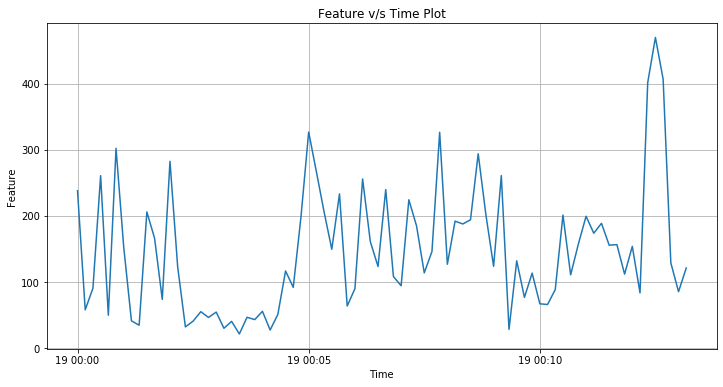

In [222]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['feature'])
plt.title('Feature v/s Time Plot')
plt.xlabel('Time')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

# STEP 1

### Decompostion to check seasonal and trend

C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


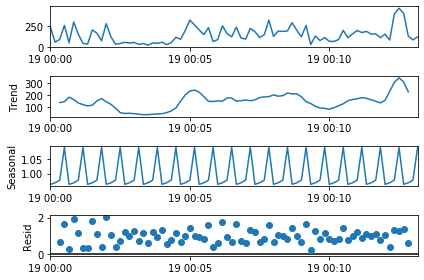

In [223]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative',freq=4)
result.plot()
plt.show()

#### Based on the Decompostion graph it can be observerd that the feature value of the train_csv has trend towards upside  

# STEP 2

#### Now we are splitting the train_csv file into two (train and test) , where 70% is train and 30% is test

In [225]:
train = df.feature[0:int(len(df)*0.7)]
test = df.feature[int(len(df)*0.7):]

# STEP 3

### *Checking Whether the featrue values of the timeseries are stationary or non stationary 
### * Also, if non stationary , then making it stationary

### Here we are using Dicky Fuller Test to verify the null hypothesis on the timeseries to check whether the timeseries is stationay or non stationary.

In [226]:
from statsmodels.tsa.stattools import adfuller

In [227]:
def adfuller_test(ff):
    result=adfuller(ff)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("stationary")
    else:
        print(" non-stationary ")

In [228]:
adfuller_test(train)

ADF Test Statistic : -2.019202121522598
p-value : 0.27821761851261906
#Lags Used : 2
Number of Observations Used : 53
 non-stationary 


#### Since the train timeseries is not stationary, we will make it stationary by differencing process

### Differencing (used to remove the trend to make the time series stationary)

In [229]:
d=df.head(int(len(df)*0.7))
d.head(5)

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


#### The 'd' datafrme is created to make the train series more prominent

In [235]:
d.shape

(56, 3)

In [236]:
d['Feature 1st Order Difference']=d['feature'].diff()
d['Feature 2nd Order Difference']=d['feature'].diff().diff()

C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [237]:
d.head(5)

,feature,Feature 1st Order Difference,Feature 2nd Order Difference
time,,,
2019-03-19 00:00:00,237.97,NaN,NaN
2019-03-19 00:00:10,57.93,-180.04,NaN
2019-03-19 00:00:20,90.53,32.60,212.64
2019-03-19 00:00:30,260.75,170.22,137.62
2019-03-19 00:00:40,49.70,-211.05,-381.27


In [238]:
adfuller_test(d['Feature 1st Order Difference'].dropna())

ADF Test Statistic : -10.638829560592471
p-value : 4.990780883906102e-19
#Lags Used : 1
Number of Observations Used : 53
stationary


In [239]:
adfuller_test(d['Feature 2nd Order Difference'].dropna())

ADF Test Statistic : -9.469307185400407
p-value : 4.147512368106588e-16
#Lags Used : 2
Number of Observations Used : 51
stationary


#### Here we did 1st order  and 2nd order diffencecing of the feature value of the 'd' dataframe,the technique is based on simple subtraction on lower row value to upper row value with respect to periods and store the result value in lower value section along with keeping the the upper value section NaN

#### Now with the Dicky fuller test we verified that the 1st order and 2nd order differences have p-values less than 0.05 therefor null-hypothesis can be rejected and the timeseries is now stationary

### Ploting the columns timeseries

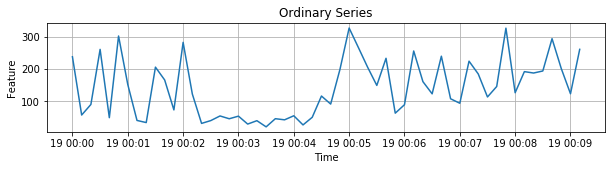

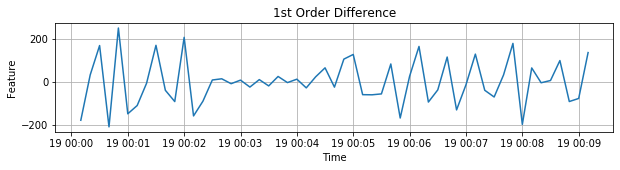

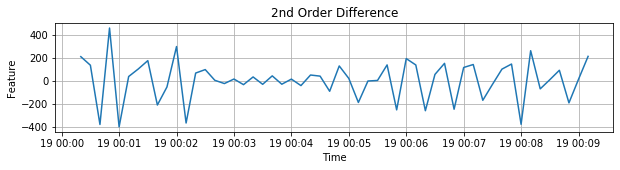

In [240]:
#Ordinary
plt.figure(figsize=(10,2))
plt.plot(d['feature'])
plt.title('Ordinary Series')
plt.xlabel('Time')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

#1st
plt.figure(figsize=(10,2))
plt.plot(d['Feature 1st Order Difference'])
plt.title('1st Order Difference')
plt.xlabel('Time')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

#2nd
plt.figure(figsize=(10,2))
plt.plot(d['Feature 2nd Order Difference'])
plt.title('2nd Order Difference')
plt.xlabel('Time')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


# STEP 4

### Autocorrelation and Partial Autocorrelation Using ARIMA

#### ARIMA stands for Autoregressive Integrated Moving Average

##### This is the most commonly used for time series analysis.It consists of three parts
      
*Autoregression (AR) refers to a model that shows a changing variable that regresses on its own lagged or values.
      
*Integrated (I) represents the differencing of raw observations to allow for the time series to become stationary,i.e.,data values are replaced by the difference between the data values and the previous values.
      
*Moving average (MA) incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Two methods used here are ACF- Autocorrelation Function and PACF-Partial Autocorrelation Function

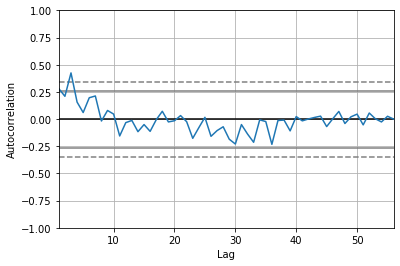

In [241]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train)
plt.show()

In [242]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

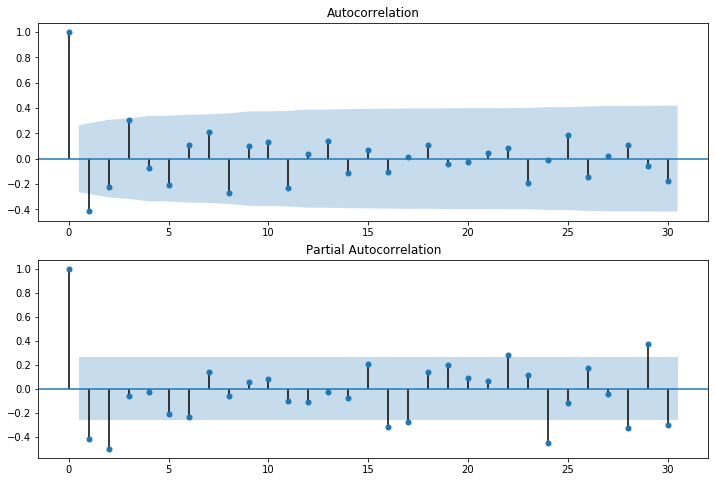

In [243]:
train_diff= train.diff(periods=1)
train_diff.dropna(inplace=True)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_diff,lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_diff,lags=30,ax=ax2)

#### p= 1 or 2 this is observed based on PACF (AR model)--->[PACF- Partial Autocorrelation Function]
#### q= 0 or 1 this is observed based on ACF (MA model)--->[ACF- Autocorrelation Function]
#### di= difference , here we are considering 1st order difference,so di=1

# STEP 5

### Forecasting with ARIMA

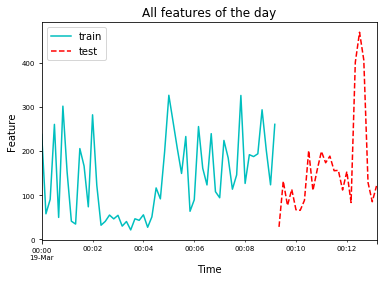

In [244]:
train.plot( title= 'All features of the day', fontsize=7,color='c',label='train') 
test.plot( title= 'All features of the day', fontsize=7,color='r',linestyle='dashed',label='test') 
plt.xlabel('Time')
plt.ylabel('Feature')
plt.legend()
plt.show()

In [245]:
from statsmodels.tsa.arima_model import ARIMA

In [246]:
#Building Model
def modelling(p,di,q):
    model=ARIMA(train,order=(p,di,q))
    model_fit=model.fit()
    return(model.fit())
    

In [247]:
#Forecasting and Plotting
def forecasting(fore):
    # Forecast
    fc, se, conf = fore.forecast(24, alpha=0.05)  

    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(8,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    
    #RMSE SCORE
    rmse = np.mean((fc - test)**2)**.5  # RMSE
    print('RMSE Score:',rmse)

## Combination Test 1 (p=1, di=1, q=0)

C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


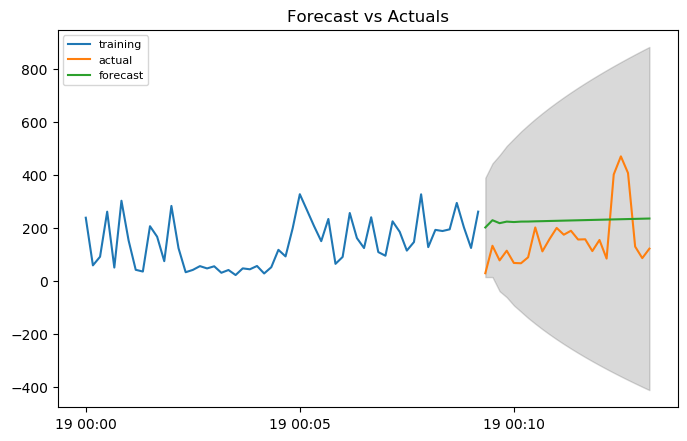

RMSE Score: 124.96189505720127


C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.feature   No. Observations:                   55
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -329.011
Method:                       css-mle   S.D. of innovations             95.688
Date:                Fri, 12 Jun 2020   AIC                            664.022
Time:                        16:56:19   BIC                            670.044
Sample:                    03-19-2019   HQIC                           666.350
                         - 03-19-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6624      8.996      0.074      0.941     -16.969      18.294
ar.L1.D.feature    -0.4424      0.125     -3.535      0.000      -0.688      -0.197
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.2606           +0.0000j            2.2606            0.5000
-----------------------------------------------------------------------------
"""

In [248]:
forecasting(modelling(1,1,0))
modelling(1,1,0).summary()

## Combination Test 2 (p=2, di=1, q=0)

C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


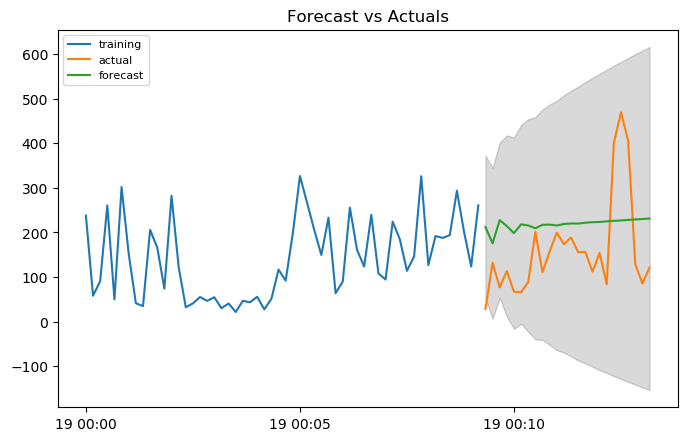

RMSE Score: 121.49392977684677


C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.feature   No. Observations:                   55
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -320.824
Method:                       css-mle   S.D. of innovations             81.988
Date:                Fri, 12 Jun 2020   AIC                            649.648
Time:                        16:56:31   BIC                            657.678
Sample:                    03-19-2019   HQIC                           652.753
                         - 03-19-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0646      5.131      0.207      0.836      -8.993      11.122
ar.L1.D.feature    -0.6664      0.119     -5.591      0.000      -0.900      -0.433
ar.L2.D.feature    -0.5195      0.117     -4.439      0.000      -0.749      -0.290
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6414           -1.2303j            1.3874           -0.3265
AR.2           -0.6414           +1.2303j            1.3874            0.3265
-----------------------------------------------------------------------------
"""

In [249]:
forecasting(modelling(2,1,0))
modelling(2,1,0).summary()

## Combination Test 3 (p=2, di=1, q=1)

C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


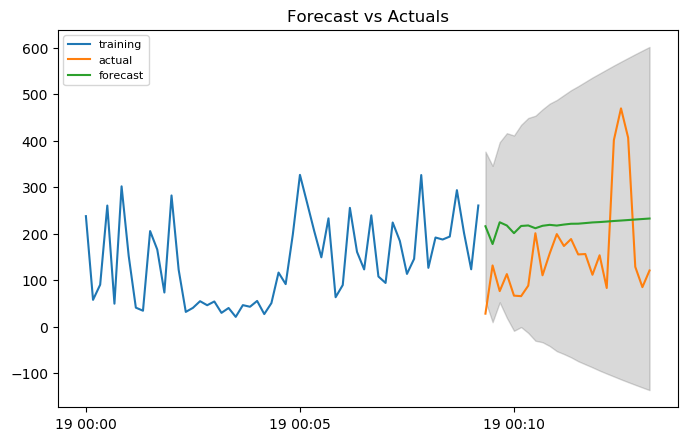

RMSE Score: 122.09834901848554


C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.feature   No. Observations:                   55
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -320.775
Method:                       css-mle   S.D. of innovations             81.912
Date:                Fri, 12 Jun 2020   AIC                            651.550
Time:                        16:56:38   BIC                            661.587
Sample:                    03-19-2019   HQIC                           655.431
                         - 03-19-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0771      4.880      0.221      0.825      -8.488      10.643
ar.L1.D.feature    -0.5950      0.270     -2.206      0.027      -1.124      -0.066
ar.L2.D.feature    -0.4885      0.164     -2.971      0.003      -0.811      -0.166
ma.L1.D.feature    -0.0940      0.312     -0.301      0.763      -0.706       0.518
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6090           -1.2947j            1.4308           -0.3200
AR.2           -0.6090           +1.2947j            1.4308            0.3200
MA.1           10.6438           +0.0000j           10.6438            0.0000
-----------------------------------------------------------------------------
"""

In [250]:
forecasting(modelling(2,1,1))
modelling(2,1,1).summary()

## Combination Test 4 (p=1, di=1, q=1)

C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


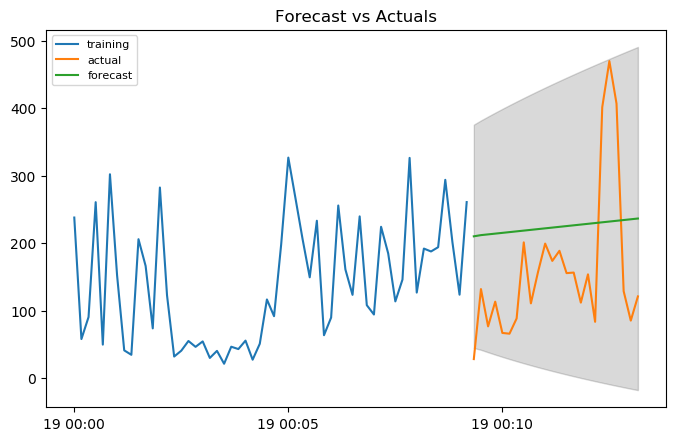

RMSE Score: 122.93143197824688


C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.feature   No. Observations:                   55
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -322.435
Method:                       css-mle   S.D. of innovations             84.413
Date:                Fri, 12 Jun 2020   AIC                            652.870
Time:                        16:56:44   BIC                            660.899
Sample:                    03-19-2019   HQIC                           655.975
                         - 03-19-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1183      2.945      0.380      0.704      -4.654       6.891
ar.L1.D.feature    -0.0125      0.195     -0.064      0.949      -0.395       0.370
ma.L1.D.feature    -0.7533      0.144     -5.225      0.000      -1.036      -0.471
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -79.8544           +0.0000j           79.8544            0.5000
MA.1            1.3275           +0.0000j            1.3275            0.0000
-----------------------------------------------------------------------------
"""

In [251]:
forecasting(modelling(1,1,1))
modelling(1,1,1).summary()

#### From the above combinational tests 1,2,3,4 the RMSE SCORES that we got are :-
##### Test 1 = 124.96 {p=1, di=1, q=0}
##### Test 2 = 121.49 {p=2, di=1, q=0}
##### Test 3 = 122.09 {p=2, di=1, q=1}
##### Test 4 = 122.93 {p=1, di=1, q=1}

In [252]:
def predict(series):
    forecast = series.forecast(steps=40)[0]
    dd_to_pred = pd.read_csv(r'C:\Users\Angshuman Bardhan\Desktop\TerraBlue XT\predice-el-futuro\test_csv.csv')
    dd_to_pred['forecast'] = forecast
    return(dd_to_pred.head(10))#Showing only first ten data

### Based on Test 1 { RMSE SCORE = 124.96 ,p=1, di=1, q=0}

In [253]:
series=modelling(1,1,0)
predict(series)

C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


,id,time,forecast
0,80,2019-03-19 00:13:20,201.134507
1,81,2019-03-19 00:13:30,228.514100
2,82,2019-03-19 00:13:40,217.358038
3,83,2019-03-19 00:13:50,223.248353
4,84,2019-03-19 00:14:00,221.598146
5,85,2019-03-19 00:14:10,223.283515
6,86,2019-03-19 00:14:20,223.493380
7,87,2019-03-19 00:14:30,224.355939
8,88,2019-03-19 00:14:40,224.929777
9,89,2019-03-19 00:14:50,225.631332


### Based on Test 2 { RMSE SCORE = 121.49 ,p=2, di=1, q=0}

In [255]:
series=modelling(2,1,0)
predict(series)

C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


,id,time,forecast
0,80,2019-03-19 00:13:20,212.225706
1,81,2019-03-19 00:13:30,175.693868
2,82,2019-03-19 00:13:40,227.634079
3,83,2019-03-19 00:13:50,214.328405
4,84,2019-03-19 00:14:00,198.539693
5,85,2019-03-19 00:14:10,218.299786
6,86,2019-03-19 00:14:20,215.661711
7,87,2019-03-19 00:14:30,209.481680
8,88,2019-03-19 00:14:40,217.297344
9,89,2019-03-19 00:14:50,217.626920


### Based on Test 3 { RMSE SCORE = 122.09 , p=2, di=1, q=1}

In [256]:
series=modelling(2,1,1)
predict(series)

C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


,id,time,forecast
0,80,2019-03-19 00:13:20,216.205461
1,81,2019-03-19 00:13:30,178.005773
2,82,2019-03-19 00:13:40,224.797890
3,83,2019-03-19 00:13:50,217.859689
4,84,2019-03-19 00:14:00,201.374979
5,85,2019-03-19 00:14:10,216.817278
6,86,2019-03-19 00:14:20,217.925533
7,87,2019-03-19 00:14:30,211.966968
8,88,2019-03-19 00:14:40,217.215346
9,89,2019-03-19 00:14:50,219.247356


### Based on Test 4 { RMSE SCORE = 122.93 , p=1, di=1, q=1}

In [257]:
series=modelling(1,1,1)
predict(series)

C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\Angshuman Bardhan\New\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


,id,time,forecast
0,80,2019-03-19 00:13:20,210.144459
1,81,2019-03-19 00:13:30,211.911997
2,82,2019-03-19 00:13:40,213.022175
3,83,2019-03-19 00:13:50,214.140584
4,84,2019-03-19 00:14:00,215.258891
5,85,2019-03-19 00:14:10,216.377199
6,86,2019-03-19 00:14:20,217.495507
7,87,2019-03-19 00:14:30,218.613815
8,88,2019-03-19 00:14:40,219.732123
9,89,2019-03-19 00:14:50,220.850431
